#**MATH352 Final Project - Spring 2023**
**Sumedh Khanolkar**

For this project, I used the following resources:

1. Python files/notebooks (available on Canvas):
- ```fem1dP2TimeDependent.ipynb``` written by Alessandro Veneziani for exercise 1
- ```insulating10mm.py``` written by Alessandro Veneziani for exercise 2
- ```fem1dP1.ipynb``` written by Alessandro Veneziani for bonus question
- ```HW2.ipynb``` written by me for bonus question

2. 2021 Videos (available on Canvas):
- BoundaryConditionsVariationalFormulation
- Week13Day1
- Week13Day2
- Week13Day3
- Week13Day4

3. My class notes

4. ```NUMERICAL%20PDEs-1.pdf``` written by Alessandro Veneziani (available on Canvas)

5. ParaView Documentation, available at https://docs.paraview.org/en/latest/index.html

6. FEniCS Documentation, available at https://fenicsproject.org/olddocs/dolfin/2019.1.0/python/

#**Exercise 1**

We consider the Black and Scholes equation - Put Option: $V$ is the value of the Put option based on
  the asset with price $x$, $E$ is the strike price, $r$ the
  inflaction rate and $\sigma$ the volatility: 

$$
 \left\{\begin{array}{l}
       \dfrac{\partial V}{\partial \tau} + \dfrac{1}{2} \sigma^2 x^2
       \dfrac{\partial^2 V}{\partial x^2} + r x \dfrac{\partial V}{\partial x}
       - r V = 0, \qquad \tau \in (0, T], x \in (0, x_{MAX})\\
       V (x, T) = \max (E - x, 0),\\
       V (0, \tau) = E e^{- r (T - \tau)}, \quad V (x_{MAX}, \tau) = 0.
     \end{array}\right.
$$     

In the following, set $E = 30$, $r = 0.05$, $\sigma = 0.1$, $x_{MAX} = 100$, $T = 1.$ 

This is a final value problem. Convert it into a classical initial value problem with the change of
  variable $t = T - \tau$, so that the final time $\tau = T$ is mapped into
  the initial time $t = 0$.
  

## Part 1
Write the problem in the form (for $t = T - \tau$):
$$
\begin{array}{l}
\dfrac{\partial V}{\partial t} - \dfrac{\partial}{\partial x} \left(
         \mu (x) \dfrac{\partial^{} V}{\partial x^{}} \right) + \beta (x)
         \dfrac{\partial V}{\partial x} + \gamma V = 0, \qquad t \in (0, T], x
         \in (0, x_{MAX})\\
         V (x, 0) = \max (E - x, 0),\\
         V (0, t) = E e^{- r (T - \tau)}, \quad V (x_{MAX}, t) = 0
\end{array}, 
$$       
by finding appropriate coefficents $\mu (x) > 0$, $\beta (x)$ and $\gamma$.

Solution to 1: The change of variables is $t = T - \tau$ where $T$ is the final time. Hence, the partial derivative of $V$ wrt $\tau$ becomes
$$ \frac{\partial V}{\partial\tau} = - \frac{\partial V}{\partial t}. $$

Note that the $x$ derivatives remain unchanged as $x$ is not transformed. In this form, the Black-Scholes equation then becomes
$$ -\dfrac{\partial V}{\partial t} + \dfrac{1}{2} \sigma^2 x^2 \dfrac{\partial^2 V}{\partial x^2} + r x \dfrac{\partial V}{\partial x} - r V = 0, \qquad t \in [0, T), x \in (0, x_{MAX}), $$

or upon multiplication by $-1$, it takes the form
$$ \dfrac{\partial V}{\partial t} - \dfrac{1}{2} \sigma^2 x^2 \dfrac{\partial^2 V}{\partial x^2} - r x \dfrac{\partial V}{\partial x} + r V = 0, \qquad t \in [0, T), x \in (0, x_{MAX}). $$

Hence, upon comparing to the form of the time-dependent advection-diffusion-reaction (ADR) equation, we get that $\mu(x) = \sigma^2 x^2 / 2 > 0$ for all $x$ and $\gamma = r$. Additionally, we get that
$$ -\mu'(x) + \beta(x) = -rx. $$

Subsituting the expression for $\mu$, we get
$$ -\sigma^2 x + \beta(x) = -rx. $$

Hence, $\beta(x) = (\sigma^2-r)x.$

The boundary conditions are then modified as follows:
$$ V(x, 0) = \max(E-x, 0), $$
$$ V(0, t) = E e^{-rt}, $$
$$ V(x_{MAX}, t) = 0. $$

We then use the given parameters: $E=30$, $r=0.05$, $\sigma=0.1$, $x_{MAX}=100$, $T=1$.

## Part 2
Write the weak formulation of the problem and its Finite Element
  approximation with the $\theta$-method. Specify the expected convergence rates.

Solution to 2: The "strong" problem
$$
\begin{array}{l}
\dfrac{\partial V}{\partial t} - \dfrac{\partial}{\partial x} \left(
         \mu (x) \dfrac{\partial^{} V}{\partial x^{}} \right) + \beta (x)
         \dfrac{\partial V}{\partial x} + \gamma V = 0, \qquad t \in (0, T], x
         \in (0, x_{MAX})\\
         V (x, 0) = \max (E - x, 0),\\
         V (0, t) = E e^{- r (T - \tau)}, \quad V (x_{MAX}, t) = 0.
\end{array}
$$

In the weak formulation, we want to find $V \in L^2(0, T; H_0^1(0, x_{MAX})\oplus \ell)$ such that for all $W \in H_0^1(0, x_{MAX})$ (no time-dependence for $W$), we have that
$$ \frac{d}{dt} \langle V, W \rangle_{L^2} + \int_0^{x_{MAX}} (\mu V' W' + \beta V' W + \gamma V W) \, dx = 0. $$

Here, $\ell(x, t)$ is a lifting function such that $\ell(0, t) = Ee^{-rt}$ and $\ell(x_{MAX}, t) = 0$.

We will first discretize in space. Suppose the FE piecewise linear functions (for P1) are denoted by $\phi_i$. Then we have that $u_h(x, t) = \sum_j u_j(t) \phi_j(x)$. As all $\phi_j$ are time-independent, we get that
$$ M \frac{d\mathbf{u}}{dt} + A \mathbf{u} = \mathbf{b}, $$

where $M$ is the mass matrix whose elements are the $L^2$ inner products of the $\phi_j$s, $A$ is the finite elements matrix, and $\mathbf{b}$ is the vector denoting the right side of the weak problem. This equation is the semi-discretized problem. For full discretization, we use the $\theta$-methods to get the linear system
$$ (M + \Delta t \,\theta A) \mathbf{u}^{n+1} = (M - \Delta t (1-\theta)A)\mathbf{u}^n + \Delta t (\theta \,\mathbf{b}^{n+1} + (1-\theta)\mathbf{b}^n). $$

Here, $\theta\in [0, 1]$. The $L^2(H^1)$ norm of the error scales as $\mathcal{O}(h^p) + \mathcal{O}(\Delta t^r)$, where $p, r$ are as follows:

1. Suppose the solution $u$ is in the space $L^2(H^s)$ and the order of FE is $q$. Then $p = \min(s-1, q)$.
2. If $\theta = 1/2$, then $r=2$. Else, $r=1$.

In our implementation, we will use $\theta=1/2$ and P2. As the solution lies in $L^2(H^1)$, we expect the error to scale as $\mathcal{O}(h^0) + \mathcal{O}(\Delta t^2)$.

## Part 3
Solve the finite element approximation. 
Try with different discretization parameters $h$ and $\Delta t$. (Suggested initial  values: $h = 1$, $\Delta t = 0.01$).

Solution to 3: As a result of the above, we will use FE of order 2, i.e., P2 for space and $\theta=1/2$, i.e., Crank-Nicholson for time. The code is adapted from the file `fem1dP2TimeDependent.ipynb`, written by Alessandro Veneziani.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg
from scipy import integrate

In Lagrangian finite elements of order 2, we consider the domain to be a mesh of points and associate a piecewise quadratic function with each point. These functions take the value 1 at the associated points and 0 at other mesh points. As a result, we can define a hat space where the piecewise quadratic functions which are non-zero in an individual mesh element. We can then map between a mesh element and this hat space as the calculations for each mesh element are of the same form. We thus define the hat space functions and the conversion maps.

In [2]:
# Map to go from hat space to real space
def mapd(xh, xi, xip1):
    x = xi + (xip1 - xi) * xh
    j = xip1 - xi
    return x, j

# Map to go from real space to hat space
def mapi(x, xi, xip1):
    xh = (x - xi) / (xip1 - xi)
    ji = 1 / (xip1 - xi)
    return xh, ji

In [3]:
# Hat space functions. The "d" indicates first derivative.
def phi02(xh):
    # P2 reference function 0 in hat space
    return 2 * (1 - xh) * (1 / 2 - xh)

def dphi02(xh):
    # P2 reference function 0 in hat space
    return -2 * (1 / 2 - xh) - 2 * (1 - xh)

def phi12(xh):
    # P2 reference function 1 in hat space
    return 4 * (1 - xh) * xh

def dphi12(xh):
    # P2 reference function 1 in hat space
    return 4 - 8 * xh

def phi22(xh):
    # P2 reference function 2 in hat space
    return -2 * (1 / 2 - xh) * xh

def dphi22(xh):
    # P2 reference function 2 in hat space
    return 2 * xh - 2 * (1 / 2 - xh) 

Let us now define the forcing term $f$, the physical parameters, and the initial and boundary conditions.

In [4]:
# Constants
E = 30          # Strike price
r = 0.05        # Inflation rate
sigma = 0.1     # Market volatility

# Forcing term
def f(x, t):
    return  0 * x + 0.

# Diffusion coefficient
def mu(x, t):
    return 0.5 * (sigma ** 2) * (x ** 2)

# Advection coefficient
def beta(x, t):
    return (sigma ** 2 - r) * x

# Reaction coefficient
def gamma(x, t):
    return r + 0. * x

# Coefficient of dV/dt
def rho(x):
    return 1. + 0. * x

# Initial condition
def ic(x):
    return np.where(x < E, E - x, 0)

# Boundary conditions
def bc(a, b, t):
    ul = E * np.exp(-1. * r * t)    # On the left: x = a
    ur = 0.                         # On the right: x = b
    return ul, ur

We want to construct the matrix $A$ by adding the contributions from each mesh element. Calculating the appropriate contributions is called local assembly. We must do this for $M$ and for the matrix $A$.

In [5]:
# Mass local assembly
def mass_loc_asmb2(element, mesh, wg, xhg):
    M_l = [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]]

    c = mesh[element]
    d = mesh[element + 1]
    x, j = mapd(xhg, c, d)

    M_l[0][0] = sum(wg * (rho(x) * phi02(xhg) * phi02(xhg)) * j)
    M_l[0][1] = sum(wg * (rho(x) * phi02(xhg) * phi12(xhg)) * j)
    M_l[0][2] = sum(wg * (rho(x) * phi02(xhg) * phi22(xhg)) * j)
    M_l[1][0] = sum(wg * (rho(x) * phi12(xhg) * phi02(xhg)) * j)
    M_l[1][1] = sum(wg * (rho(x) * phi12(xhg) * phi12(xhg)) * j)
    M_l[1][2] = sum(wg * (rho(x) * phi12(xhg) * phi22(xhg)) * j)
    M_l[2][0] = sum(wg * (rho(x) * phi22(xhg) * phi02(xhg)) * j)   
    M_l[2][1] = sum(wg * (rho(x) * phi22(xhg) * phi12(xhg)) * j)    
    M_l[2][2] = sum(wg * (rho(x) * phi22(xhg) * phi22(xhg)) * j)

    return M_l    

In [6]:
# Local assembly
def loc_asmb2(element, mesh, wg, xhg, t):
    A_l = [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]]
    b_l = [[0.],
           [0.],
           [0.]]

    c = mesh[element]
    d = mesh[element + 2]
    x, j = mapd(xhg, c, d)
    ji = 1 / j

    A_l[0][0] = sum(wg * (mu(x, t) * dphi02(xhg) * dphi02(xhg) * ji ** 2 + \
                        beta(x, t) * dphi02(xhg) * phi02(xhg) * ji + \
                        gamma(x, t) * phi02(xhg) * phi02(xhg)) * j)
    A_l[0][1] = sum(wg * (mu(x, t) * dphi12(xhg) * dphi02(xhg) * ji ** 2 + \
                        beta(x, t) * dphi12(xhg) * phi02(xhg) * ji + \
                        gamma(x,t) * phi12(xhg) * phi02(xhg)) * j)
    A_l[0][2] = sum(wg * (mu(x, t) * dphi22(xhg) * dphi02(xhg) * ji ** 2 + \
                        beta(x, t) * dphi22(xhg) * phi02(xhg) * ji + \
                        gamma(x, t) * phi22(xhg) * phi02(xhg)) * j)
    A_l[1][0] = sum(wg * (mu(x, t) * dphi02(xhg) * dphi12(xhg) * ji ** 2 + \
                        beta(x, t) * dphi02(xhg) * phi12(xhg) * ji + \
                        gamma(x, t) * phi02(xhg) * phi12(xhg)) * j)
    A_l[1][1] = sum(wg * (mu(x, t) * dphi12(xhg) * dphi12(xhg) * ji ** 2 + \
                        beta(x, t) * dphi12(xhg) * phi12(xhg) * ji + \
                        gamma(x,t) * phi12(xhg) * phi12(xhg)) * j)
    A_l[1][2] = sum(wg * (mu(x, t) * dphi22(xhg) * dphi12(xhg) * ji ** 2 + \
                        beta(x, t) * dphi22(xhg) * phi12(xhg) * ji + \
                        gamma(x, t) * phi22(xhg) * phi12(xhg)) * j)
    A_l[2][0] = sum(wg * (mu(x, t) * dphi02(xhg) * dphi22(xhg) * ji ** 2 + \
                        beta(x, t) * dphi02(xhg) * phi22(xhg) * ji + \
                        gamma(x, t) * phi02(xhg) * phi22(xhg)) * j)
    A_l[2][1] = sum(wg * (mu(x, t) * dphi12(xhg) * dphi22(xhg) * ji ** 2 + \
                        beta(x, t) * dphi12(xhg) * phi22(xhg) * ji + \
                        gamma(x, t) * phi12(xhg) * phi22(xhg)) * j)
    A_l[2][2] = sum(wg*(mu(x, t) * dphi22(xhg) * dphi22(xhg) * ji ** 2 + \
                        beta(x, t) * dphi22(xhg) * phi22(xhg) * ji + \
                        gamma(x, t) * phi22(xhg) * phi22(xhg)) * j)
    
    b_l[0] = sum(wg * (f(x, t) * phi02(xhg)) * j)
    b_l[1] = sum(wg * (f(x, t) * phi12(xhg)) * j)
    b_l[2] = sum(wg * (f(x, t) * phi22(xhg)) * j)

    return A_l, b_l  

Next we define functions to plot the solution and its x-derivative. Note that se are skipping error computation for now as we do not know the exact solution.

In [7]:
# Plot solution at time t
def plot_fine_u(x, q, wg, xhg, u, t, h, dt):
    Np1 = np.size(x)
    
    for el in range(0, Np1 - 2, 2):
        xx = np.linspace(x[el], x[el + 2], q + 1)
        xh, ji = mapi(xx, x[el], x[el + 2])
        uc = u[el] * phi02(xh) + u[el + 1] * phi12(xh) + u[el + 2] * phi22(xh)
        plt.plot(xx, uc, 'b')
        
    plt.title("$V(x,$ " + str(t) + "$)$ for $h=$" + str(h) + ", $\Delta t=$" + str(dt))
    plt.xlabel("$x$")
    plt.ylabel("$V(x, t)$")
    plt.show()   
    
    return 0

We now define the integration technique (Gauss-Legendre).

In [8]:
deg = 10
xr, w = np.polynomial.legendre.leggauss(deg + 1)
xhg = 0.5 * (xr + 1)
wg = w / 2

We now define a function to solve the problem.

In [9]:
def solveBS(h, dt, theta):
    
    # Define variables
    # In x
    a = 0.
    b = 100.

    # In t
    t0 = 0.
    Tf = 1.

    # Discretization parameters in x
    N = int((b - a) / h)
    dim = 2 * N + 1

    # Discretization parameters in t
    nsteps = int(round((Tf - t0) / dt))

    # Miscellaneous
    aux = 1.
    q = 100

    # Set initial time
    t = t0
    x = np.linspace(a, b, dim)
    rhs = np.zeros(dim)

    # Define matrices
    A = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')
    M = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')
    LeftMatrix = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')
    RightMatrix = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')

    # Define vectors
    u = np.zeros(dim)
    u_n = np.zeros(dim)


    # Global assembly of M, and of the others at t = 0
    for el in range(0, dim - 2, 2):
        M_l = mass_loc_asmb2(el, x, wg, xhg)
        A_l, b_l = loc_asmb2(el, x, wg, xhg, t)

        for ii in range(0, 3):
            for jj in range(0, 3):
                M[el + ii, el + jj] += M_l[ii][jj]
                A[el + ii, el + jj] += A_l[ii][jj]            
            
            rhs[el + ii] += b_l[ii]   

    rhsold = rhs
    u_n = ic(x)


    # Global assembly at other times
    for k in range(0, nsteps):
        t += dt

        for el in range(0, dim - 2, 2):
            A_l, b_l = loc_asmb2(el, x, wg, xhg, t)
            
            for ii in range(0,3):
                for jj in range(0,3):
                    A[el + ii, el + jj] += A_l[ii][jj]
                    
                rhs[el + ii] += b_l[ii]            

        # Theta method implementation
        rhsaux = rhs
        rhs = dt * theta * rhs + dt * (1 - theta) * rhsold
        rhsold = rhsaux
        LeftMatrix = M + dt * theta * A
        RightMatrix = M - dt * (1 - theta) * A
        rhs += RightMatrix * u_n
        # The system to be solved is LeftMatrix * u_{n+1} = rhs

        # Boundary conditions
        uL, uR = bc(a, b, t)

        LeftMatrix[0, 1] = 0.       # Left
        LeftMatrix[0, 2] = 0.       # Left
        LeftMatrix[-1, -3] = 0.     # Right
        LeftMatrix[-1, -2] = 0.     # Right
        LeftMatrix[0, 0] = aux      # Left
        LeftMatrix[-1, -1] = aux    # Left

        rhs[0] = uL * aux           # Left
        rhs[-1] = uR * aux          # Right

    
    # Solving
    u = sp.linalg.spsolve(LeftMatrix, rhs)
    u_n = u
    
    # Free memory    
    rhs = np.zeros(dim)
    A = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')
    LeftMatrix = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')
    RightMatrix = sp.diags([0., 0., 0., 0., 0.], [-2, -1, 0, 1, 2], shape = [dim, dim], format = 'csr')

    # Return final values
    return x, u

## Part 4
Report a plot of the solution $V (x, \tau = 0)$. In particular, compute $V (32, \tau = 0)$ knowing that the "exact" solution reads 0.1892. Comment on the accuracy of your solver as a function of $h$    and $\Delta t$.

Solution to 4: Here is a plot of $V(x, \tau=0) = V(x, t=T)$ with $h=1, \Delta t=0.01, \theta=1/2$ (Crank-Nicolson). The relative error at $x=32$ is 46.5% (see below).

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


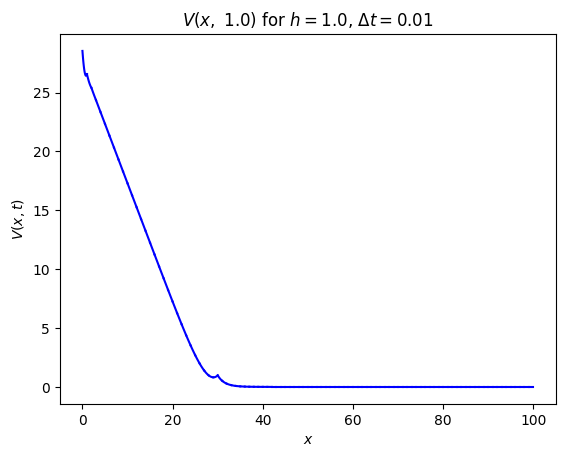

0

In [10]:
x, u = solveBS(1., 0.01, 0.5)
plot_fine_u(x, 100, wg, xhg, u, 1., 1., 0.01)

We now repeat this for $h=1, 0.5, 0.25, 0.125$ and $\Delta t=0.01, 0.005, 0.0025, 0.00125$. Note that this will take a lot of time - about an hour on Colab.

In [11]:
harr = np.array([1., 0.5, 0.25, 0.125])
dtarr = np.array([0.01, 0.005, 0.0025, 0.00125])
errarr = np.zeros((4, 4))

for hidx in range(0, 4):
    for dtidx in range(0, 4):
        h = harr[hidx]
        dt = dtarr[dtidx]
        print("Now executing h=" + str(h) + ", dt=" + str(dt))
        x, u = solveBS(h, dt, 0.5)
        index = np.abs(x-32).argmin()
        errarr[hidx][dtidx] = u[index]

Now executing h=1.0, dt=0.01
Now executing h=1.0, dt=0.005
Now executing h=1.0, dt=0.0025
Now executing h=1.0, dt=0.00125
Now executing h=0.5, dt=0.01
Now executing h=0.5, dt=0.005
Now executing h=0.5, dt=0.0025
Now executing h=0.5, dt=0.00125
Now executing h=0.25, dt=0.01
Now executing h=0.25, dt=0.005
Now executing h=0.25, dt=0.0025
Now executing h=0.25, dt=0.00125
Now executing h=0.125, dt=0.01
Now executing h=0.125, dt=0.005
Now executing h=0.125, dt=0.0025
Now executing h=0.125, dt=0.00125


Let us look at the relative "errors" at $x=32, \tau=0$. In the array below, the rows are (in order) $h=1, 0.5, 0.25, 0.125$ and the columns are (in order) $\Delta t=0.01, 0.005, 0.0025, 0.00125$.

In [12]:
print((errarr-0.1892)/0.1892)

[[0.46540789 0.45444143 0.44896943 0.44623623]
 [0.46527821 0.45431163 0.44883958 0.44610635]
 [0.46527038 0.4543038  0.44883174 0.44609851]
 [0.46526989 0.45430331 0.44883126 0.44609803]]


We can see that our model is not that accurate - the relative errors are around 45%! Interestingly, even though the errors decrease as $\Delta t$ decreases, the corresponding effect from $h$ is much smaller. This is expected - our solution $V$ is in the space $H^1$, and so the $h$ part of the error scales as $\mathcal{O}(h^0)$. If we fix a particular $h$ and examine the error, we can see that the $\Delta t$ part of the error scales as $\mathcal{O}(t^2)$, which is also as expected due to $\theta=1/2$. Hence, the combined error scales as $\mathcal{O}(h^0) + \mathcal{O}(t^2)$. This result is perfectly in line with part 2.

# **Exercise 2**

You are responsible for a colture of pancreas cells to be transplanted in a patient. Your mission is to decide 
the pressure of the Oxygen in the environment (a gel), to guarantee that the cell will have enough Oxygen in the center.
The cell has a spherical shape with radius $R$. Oxygen diffuses in the cell but it is also consumed by respiration according to the equation
$$
- \mu \Delta u + K u = 0
$$
in the sphere. The external pressure that you have to decide is at the bounday denoted by $u_D$.
If the pressure of Oxygen is less than 1 mmHg in the cell, the cell develops necrosis.
Assuming $R = 0.05 mm,  = 1.7 \times 10^{-6} mm^{-1}s^{-1}, K = 0.01 mm^{-3} s^{-1}$,
is an external pressure of $u_D = 5$ mmHg enough?

You need to now that:
- You can generate the mesh with any method, below  I added some fenics code to this purpose.

- Do not forget to make all the units consistent (mmHg need some conversion).

- Do not take in Colab an extremely fine mesh, to avoid memory problems. I recommend from 8 to 16 elements on the radius (see the Python code).


## Part 1
Write a Fenics (or whatever with Finite Elements) code.

Solution to 1: We first install FEniCS on the cloud server.

In [1]:
# Install FEniCS
try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl  # noqa: F401
    import dolfin  # noqa: F401
else:
    try:
        import ufl
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl  # noqa: F401
        import dolfin  # noqa: F401


--2023-05-01 01:43:13--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4156 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2023-05-01 01:43:13 (30.7 MB/s) - ‘/tmp/fenics-install.sh’ saved [4156/4156]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/6895377/releases/pybind11-install.s

In [2]:
from dolfin import *
from mshr import *

Next, we construct the mesh. The domain is a sphere centered at $(0, 0, 0)$ with radius $0.05$ mm.

In [3]:
center = Point ( 0.0, 0.0, 0.0 )
mesh = generate_mesh ( Sphere ( center, 0.05 ), 16 )
print(mesh.hmax())
print(mesh.hmin())

0.012430209179519845
0.006590482253696124


In [4]:
File("mesh.pvd") << mesh

Here is what the mesh looks like for 16 elements:
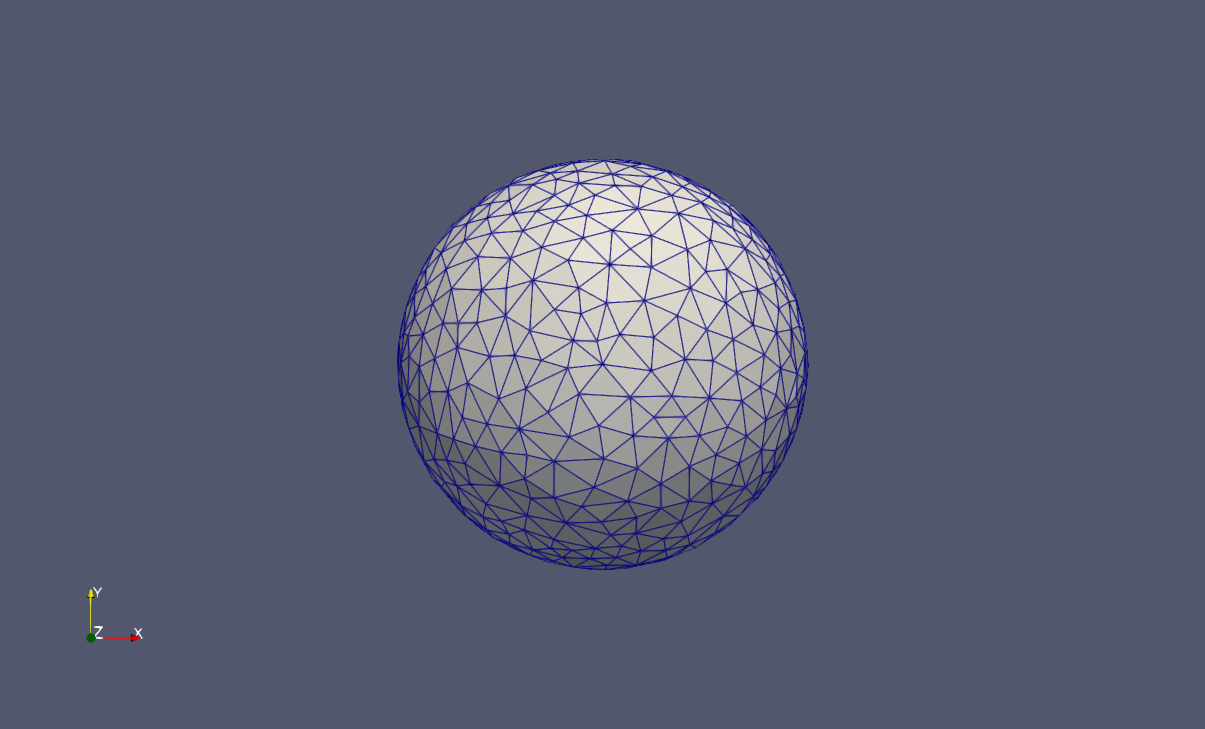

We now define the function for the boundary condition (external pressure). Note that as the pressure is specified in mmHg, we need to convert it to the appropriate unit. First, note that $5$ mmHg $= 666.612$ Pa, where in terms of base units we have $1 \text{ Pa} = 1 \text{ kg s}^{-2}\text{ m}^{-1}$. As the problem uses mm instead of m, we must specify pressures in units of millipascals. We also specify the other parameters.

In [5]:
def boundary(x, on_boundary):
    return on_boundary

# Specify finite element type
V = FunctionSpace(mesh, 'P', 2)

# Define physical parameters
u_D = Constant(666612)
mu = Constant(1.7e-6)
K = Constant(0.01)

# Setup right side of equation
f = Constant(0)

# Define Dirichlet boundary condition
bc = DirichletBC(V, u_D, boundary)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_824c573059a7f3e916bd97f1a67d95ec64aeca35

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0057044 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.579467 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:-----------------------------

We now define the rest of the problem. Note that the equation to solve is $-\mu\Delta u + Ku = 0$. The corresponding weak formulation is to find a $u\in H_{S^2}^1\oplus \ell$ such that for all $v\in H_{S^2}^1$, we have
$$ \int_{S^2} \mu \langle \nabla u, \nabla v \rangle_{L^2} \, d^3x + \int_{S^2} K u v \, d^3x = 0. $$

Here, $\ell$ is the lifting function such that $\ell(x) = u_D$ on the boundary.

In [6]:
# Define the trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# Define the bilinear form and linear functional
a = mu * dot(grad(u), grad(v)) * dx + K * u * v * dx
L = f * v * dx

# Solve the problem
# Note that here we are overloading the meaning of the variable u
u = Function(V)
fn = FacetNormal(mesh)
solve(a == L, u, bc)

# Save the solution
vtkfile = File('problem2.pvd')
vtkfile << (u)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_2afadbd2ff518b5e38899514341bd05827f76e87

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_11]'
  Unique elements:           'CG2(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'CG2(?,?), R0(?,?), Vector<3 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0632284 seconds.

INFO:FFC:Compiler st

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_cdd21d347a8b939a40c5cd04a75bdb0e0e4b85cb

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00355577 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0141613 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_d0280b54b788351a9a1c721dfa1d7a2c33a1e4f4

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00977349 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0240335 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_e6926685f1f34f2dec492a87687d37f7a8b0bd63

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00730133 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0173626 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_a0966de4b5a0936f94b2b6216e0175efa637330c

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00733685 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0158515 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cf6992a7bd08f970c889831c116e2f4a389b48a6

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL:Adjusting missing element cell to tetrahedron.
INFO:UFL:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_9, f_10]'
  Unique elements:           'CG2(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'CG2(?,?), R0(?,?), Vector<3 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 4
INFO:FFC:  quadrature_degree: 4
INFO:FFC:  
INFO:FFC:Com

Here is what the solution looks like for 16 mesh elements using the P2 method:
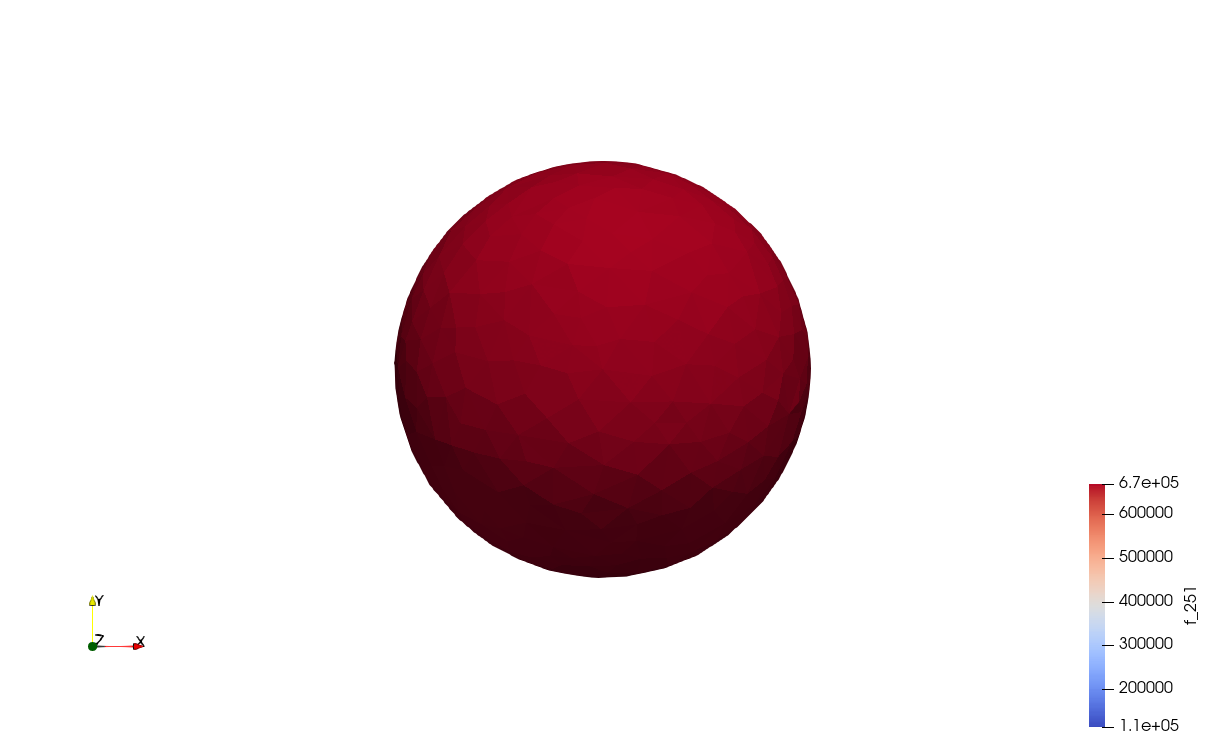

Clipping along an equatorial plane, we can see that the solution is minimized at the center:
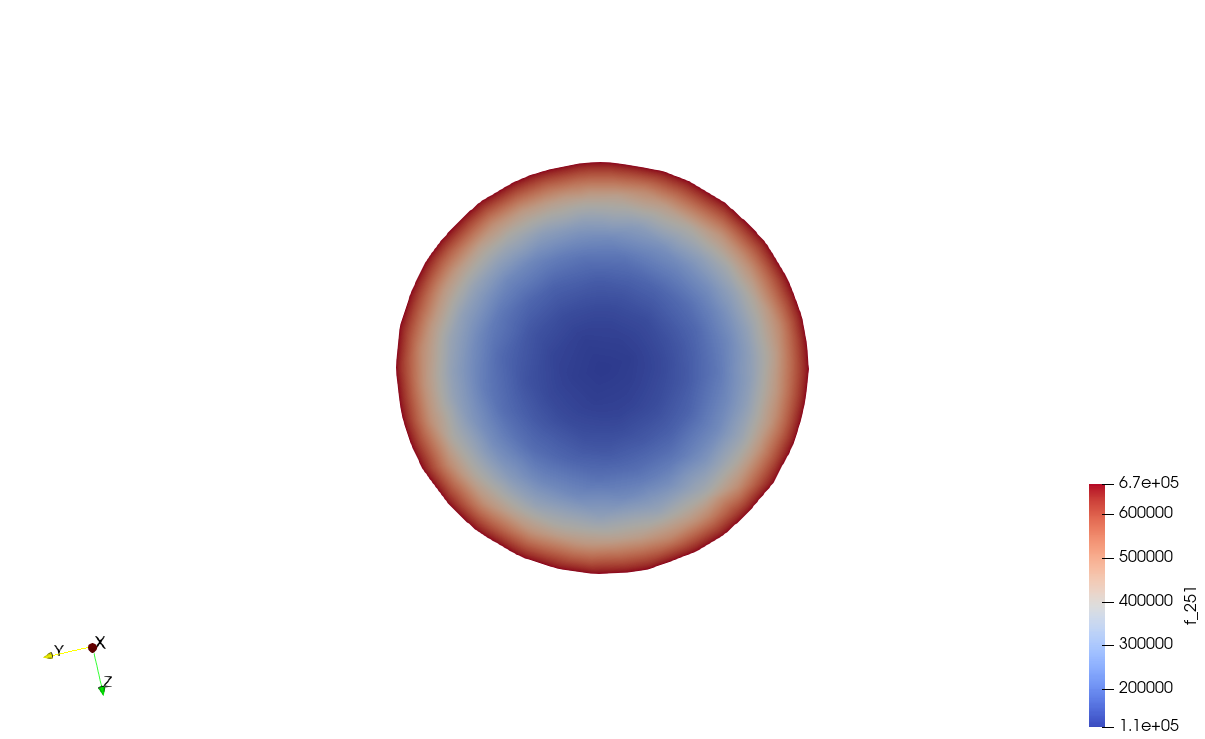

## Part 2
To certify your answer, test how your numerical results depend on the degree of the polynomials and the mesh,
to be sure that discretization errors do not mislead you.

Solution to 2: After solving the problem, I downloaded the output files and opened the .pvd file with ParaView. Using the Color Map Editor feature, I extracted the minimum value of the solution in the mesh. For 8, 10, 12, 14, 16 mesh elements, I obtained the following values for the minimum of the solution:

$\begin{array}{lllll}
\text{Mesh elements} & \text{P1 (mPa)} & \text{P1 (mmHg)} & \text{P2 (mPa)} & \text{P2 (mmHg)} \\
8             & 90084    & 0.68      & 116931   & 0.88      \\
10            & 98793    & 0.74      & 115317   & 0.86      \\
12            & 103105   & 0.77      & 114225   & 0.86      \\
14            & 105630   & 0.79      & 113626   & 0.85      \\
16            & 107025   & 0.80      & 113201   & 0.85     
\end{array}$

Please note: the .pvd and .vtu files for all of these data points are avaiable on request.

## Part 3
Provide an educated answer to the question.

Solution to 3: From part 2, we can see that as the mesh becomes finer, i.e., the numerical solution approaches the exact solution, the P1 minimum pressure increases and the P2 minimum pressure decreases. Hence, the minimum pressure according to the exact solution lies between 0.80 mmHg and 0.85 mmHg, both of which are clearly less than 1 mmHg. However, as a failsafe, observe that the highest value in the table above is 0.88 mmHg (for 8 mesh elements with P1). This is also less than 1 mmHg.

Hence, the pressure in the cell is less than 1 mmHg (at the center), and so the cell dies due to necrosis. As this is a modified diffusion process, the external pressure needs to be higher for the cell to survive.

For future directions, I would recommend setting the boundary condition to be $u_D = 7, 9, 11, 13$ mmHg (converted to mPa) and then manually adjusting it to determine the minimum external pressure needed.

# **Bonus Question [20 pts]**

The exercise can be solved by using spherical symmetry and writing a 1D problem in $(0,R)$, with appropriate boundary conditions 
(in particular in 0, where the symmetry induces certainly a critical point - a minimum or a maximum). Write c code to solve this problem, 
compare the solutions you find and comment on the different computational costs. 

Notice that if you plan to use *fem1DP?.py*, you need to adjust them for the boundary condition in 0.
You can also use Fenics in 1D for this purpose. Or any other solver.

Solution: We can transform the problem to spherical coordinates $(r, \theta, \phi)$, where $\theta$ is the polar angle and $\phi$ is the azimuthal angle (physics convention). The Laplacian then becomes
$$ \Delta u = \frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2 \frac{\partial u}{\partial r} \right) + \text{derivatives of } u \text{ wrt } \theta, \phi. $$

However, as the boundary condition is symmetric in $r$, the problem is also symmetric in $r$. Hence, the $\theta$ and $\phi$ derivatives of $u$ are zero. The equation thus becomes
$$ -\mu \frac{\partial^2 u}{\partial r^2} - \frac{2\mu}{r} \frac{\partial u}{\partial r} + Ku = 0. $$

This is also an ADR problem, but now just in 1D. There are now two boundary conditions - one at $r=0$ and the other at $r=R$. The second one is the original BC: $u(R) = u_D$. For the other one, however, observe that the flux at the center is zero as there is no source or sink there. Hence, we get the Neumann condition $u'(0) = 0$. Henceforth, we use $x$ instead of $r$.

For the solution, we adapt the file ```fem1dP1.ipynb``` written by Alessandro Veneziani and the file ```HW2.ipynb``` written by Sumedh Khanolkar. Let us begin by importing libraries. ***Note***: I was unable to completely solve this part. See explanatory note below.

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg
from scipy import integrate

In Lagrangian finite elements of order 1, we consider the domain to be a mesh of points and associate a piecewise linear function with each point. These functions take the value 1 at the associated points and 0 at other mesh points. As a result, we can define a hat space where the piecewise linear functions which are non-zero in an individual mesh element. We can then map between a mesh element and this hat space as the calculations for each mesh element are of the same form. We thus define the hat space functions and the conversion maps.

In [8]:
# Map to go from hat space to real space
def mapd(xh, xi, xip1):
    x = xi + (xip1 - xi) * xh
    j = xip1 - xi
    return x, j

# Map to go from real space to hat space
def mapi(x, xi, xip1):
    xh = (x - xi) / (xip1 - xi)
    ji = 1 / (xip1 - xi)
    return xh, ji

In [9]:
# Hat space functions. The "d" indicates first derivative
def phi01(xh):
    # reference function 0 in hat space
    return 1. - xh

def dphi01(xh):
    # reference function 0 in hat space
    return -1. + 0. * xh

def phi11(xh):
    # reference function 1 in hat space
    return xh

def dphi11(xh):
    # reference function 1 in hat space
    return 1. + 0. * xh

Let us now define the forcing term $f$, the boundary conditions and the exact solution.

In [10]:
# Forcing term
def f(x):
    return 0. + 0. * x

def mu(x):
    return 1.7 * 10 ** (-6) + 0.*x

def beta(x):
    return -2 * 1.7 * 10 ** (-6) / x

def sigma(x):
    return 0.01 + 0.*x

# Boundary conditions
def bc(a,b):
    ul = 0. # Left # Ignore this
    ur = 666612. # Right
    return ul, ur

As part of the finite elements method, we want to build the solution from linear combinations of the piecewise polynomials. For this, we need to solve a linear system. In order to construct the matrix of this system, we add the contributions from each mesh element, called local assembly.

In [11]:
def loc_asmb1(element, mesh, wg, xhg):
    A_l = [[0., 0.],
           [0., 0.]]
    b_l = [[0.],
           [0.]]

    a = mesh[element]
    b = mesh[element + 1]
    x, j = mapd(xhg, a, b)
    ji = 1 / j

    A_l[0][0] = sum(wg * (mu(x) * dphi01(xhg) * dphi01(xhg) * ji ** 2 + \
                        beta(x) * dphi01(xhg) * phi01(xhg) * ji + \
                        sigma(x) * phi01(xhg) * phi01(xhg)) * j)
    A_l[0][1] = sum(wg * (mu(x) * dphi11(xhg) * dphi01(xhg) * ji ** 2 + \
                        beta(x) * dphi11(xhg) * phi01(xhg) * ji + \
                        sigma(x) * phi11(xhg) * phi01(xhg)) * j)
    A_l[1][0] = sum(wg * (mu(x) * dphi01(xhg) * dphi11(xhg) * ji ** 2 + \
                        beta(x) * dphi01(xhg) * phi11(xhg) * ji + \
                        sigma(x) * phi01(xhg) * phi11(xhg)) * j)
    A_l[1][1] = sum(wg * (mu(x) * dphi11(xhg) * dphi11(xhg) * ji ** 2 + \
                        beta(x) * dphi11(xhg) * phi11(xhg) * ji + \
                        sigma(x) * phi11(xhg) * phi11(xhg)) * j)
    
    b_l[0] = sum(wg * (f(x) * phi01(xhg)) * j)
    b_l[1] = sum(wg * (f(x) * phi11(xhg)) * j)

    return A_l, b_l  

Next we define functions to calculate the error and plot the results.

In [12]:
# Plot solution
def plot_fine_u(x, wg, xhg, u, h):
    q = 100
    Np1 = np.size(x)

    for el in range(0, Np1 - 1):
        xx = np.linspace(x[el], x[el + 1], q + 1)
        xh, ji = mapi(xx, x[el], x[el + 1])
        uc = u[el] * phi01(xh) + u[el + 1] * phi11(xh)
        plt.plot(xx, uc, 'b--', label="Numerical")

    plt.title("Numerical solution for $h=$" + str(h))
    plt.xlabel("$x$")
    plt.ylabel("$u(x)$")
    plt.show()

    return 0

# Plot derivative of solution
def plot_fine_du(x, wg, xhg, u, h):
    q = 100
    Np1 = np.size(x)

    for el in range(0, Np1 - 1):
        xx = np.linspace(x[el], x[el + 1], q + 1)
        xh, ji = mapi(xx, x[el], x[el + 1])
        uc = u[el] * dphi01(xh) * ji + u[el + 1] * dphi11(xh) * ji
        plt.plot(xx, uc, 'b--', label="Numerical")
    
    plt.title("Derivative of numerical solution for $h=$" + str(h))
    plt.xlabel("$x$")
    plt.ylabel("$u'(x)$")
    plt.show()

    return 0

We now define the integration technique (Gauss-Legendre).

In [13]:
# Gauss-Legendre (default interval is [-1, 1])
deg = 10
xr, w = np.polynomial.legendre.leggauss(deg + 1)

# Translate x values from the interval [-1, 1] to [0, 1]
xhg = 0.5 * (xr + 1)
wg = w / 2

print(xhg)
print(wg)

[0.01088567 0.0564687  0.134924   0.24045194 0.36522842 0.5
 0.63477158 0.75954806 0.865076   0.9435313  0.98911433]
[0.02783428 0.06279018 0.09314511 0.11659688 0.13140227 0.13646254
 0.13140227 0.11659688 0.09314511 0.06279018 0.02783428]


Finally, we define a function to construct and solve the problem. This function depends on $h$, the mesh size.

***Note***: I was unable to modify the code to incorporate the Neumann boundary condition. However, I came up with the following workaround based on the fact that we have a good idea of what the pressure at the center is.

Instead of using the Neumann boundary condition, I used a Dirichlet boundary condition at the center: $u(0) = 100000$ mmHg, which is less than the FEniCS minimum.

In [14]:
def solveP1(h):

    # Define variables
    a = 0
    b = 0.05
    N = int((b - a) / h)
    uL, uR = bc(a, b)

    # Construct the mesh
    x = np.linspace(a, b, N + 1)

    # Assemble the matrices
    rhs = np.zeros(N + 1)
    A =sp.diags([0., 0., 0.], [-1, 0, 1], shape=[N + 1, N + 1], format = 'csr')
    for el in range(0, N):
        A_l, b_l = loc_asmb1(el, x, wg, xhg)
        A[el, el] += A_l[0][0]
        A[el, el + 1] += A_l[0][1]
        A[el + 1, el] += A_l[1][0]
        A[el + 1, el + 1] += A_l[1][1]
        rhs[el] += b_l[0]
        rhs[el + 1] += b_l[1]
    
    # Add the boundary conditions
    aux = 1.
    A[0, 1] = 0.
    A[-1, -2] = 0.
    A[0, 0] = aux
    A[-1, -1] = aux
    rhs[0] = 100000 * aux
    rhs[-1] = uR * aux

    # Solve the system
    u = sp.linalg.spsolve(A, rhs)

    # Plot the solution
    plot_fine_u(x, wg, xhg, u, h)
    plot_fine_du(x, wg, xhg, u, h)

    return x, u

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


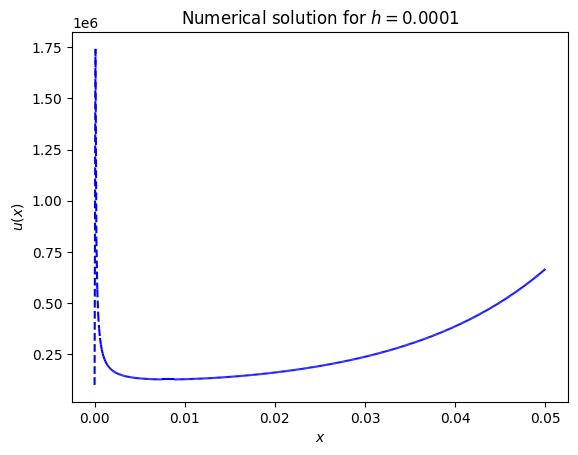

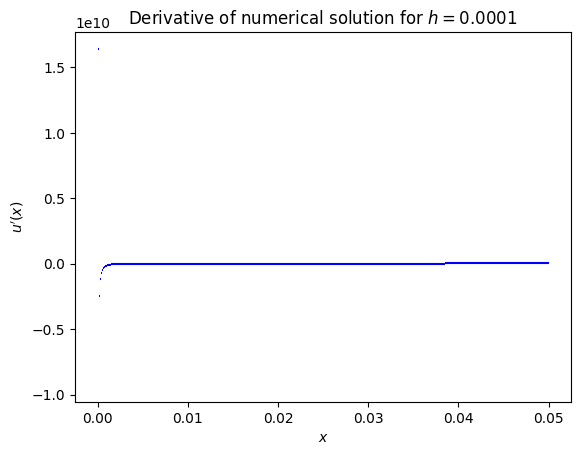

In [15]:
x, u = solveP1(0.0001)

Although we can no longer rely on using the pressure at the center, notice that there is a local minimum in the solution near $x=0.08$. This is the actual minimum of the solution if we ignore $x=0$. Let us extract it.

In [16]:
dropped_u = u[1:]
min_idx = np.argmin(dropped_u)
min = dropped_u[min_idx]
print(min)

126844.72735779961


According to this haphazard and unreliable technique, the pressure at some point in the cell is 126845 mPa, which is about 0.95 mmHg, still less than 1 mmHg. Hence, the cell still dies. However, note that the error in this solution is large as wee did not actually solve the problem. We solved a related problem using Dirichlet boundary condition and P1 (instead of P2 and Scharfetter-Gummel). Nevertheless, if implemented correctly, we would be able to see the expected error dependences in 1D.

We cannot compare the computational costs of the 2D approach and the 1D approach directly as the 2D approach was done using the optimized FEniCS library, and the 1D approach was done using non-optimal code. However, if we were to consider the case where both approaches are implemented at the same level of optimization, then the computational cost of the 1D approach would be lower as less mesh elements are needed for the same level of accuracy. In fact, even in this haphazard approach, the mesh size is less than that used for FEniCS.